In [ ]:
!nvidia-smi

Thu Aug 21 13:00:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)

OS                     Linux-6.1.123+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.11
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   39.4/112.6 GB
CPU                    Intel Xeon 2.00GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.12.0.88>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.2>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.1>=1.4.1
torch                  ✅ 2.8.0+cu126>=1.8.0
torch                  ✅ 2.8.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"
torchv

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qt4Hx7mk99uy0iom6Sag")
project = rf.workspace("mldl-loqtt").project("crime-detection-oodyj")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install ultralytics --upgrade

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/crime-detection-1/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/crime-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/crime-detection-1/data.yaml

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 861.7±155.4 MB/s, size: 38.8 KB)
val: Scanning /content/crime-detection-1/valid/labels.cache... 439 images, 0 backgrounds, 0 corrupt: 100% 439/439 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:12<00:00,  2.22it/s]
                   all        439        685      0.926      0.762      0.874      0.653
                     0        234        240      0.906      0.796      0.872      0.645
                PERSON        151        156      0.963      0.834       0.94      0.735
                   gun        205        289      0.909      0.657      0.809      0.578
Speed: 1.7ms preprocess, 20.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:/

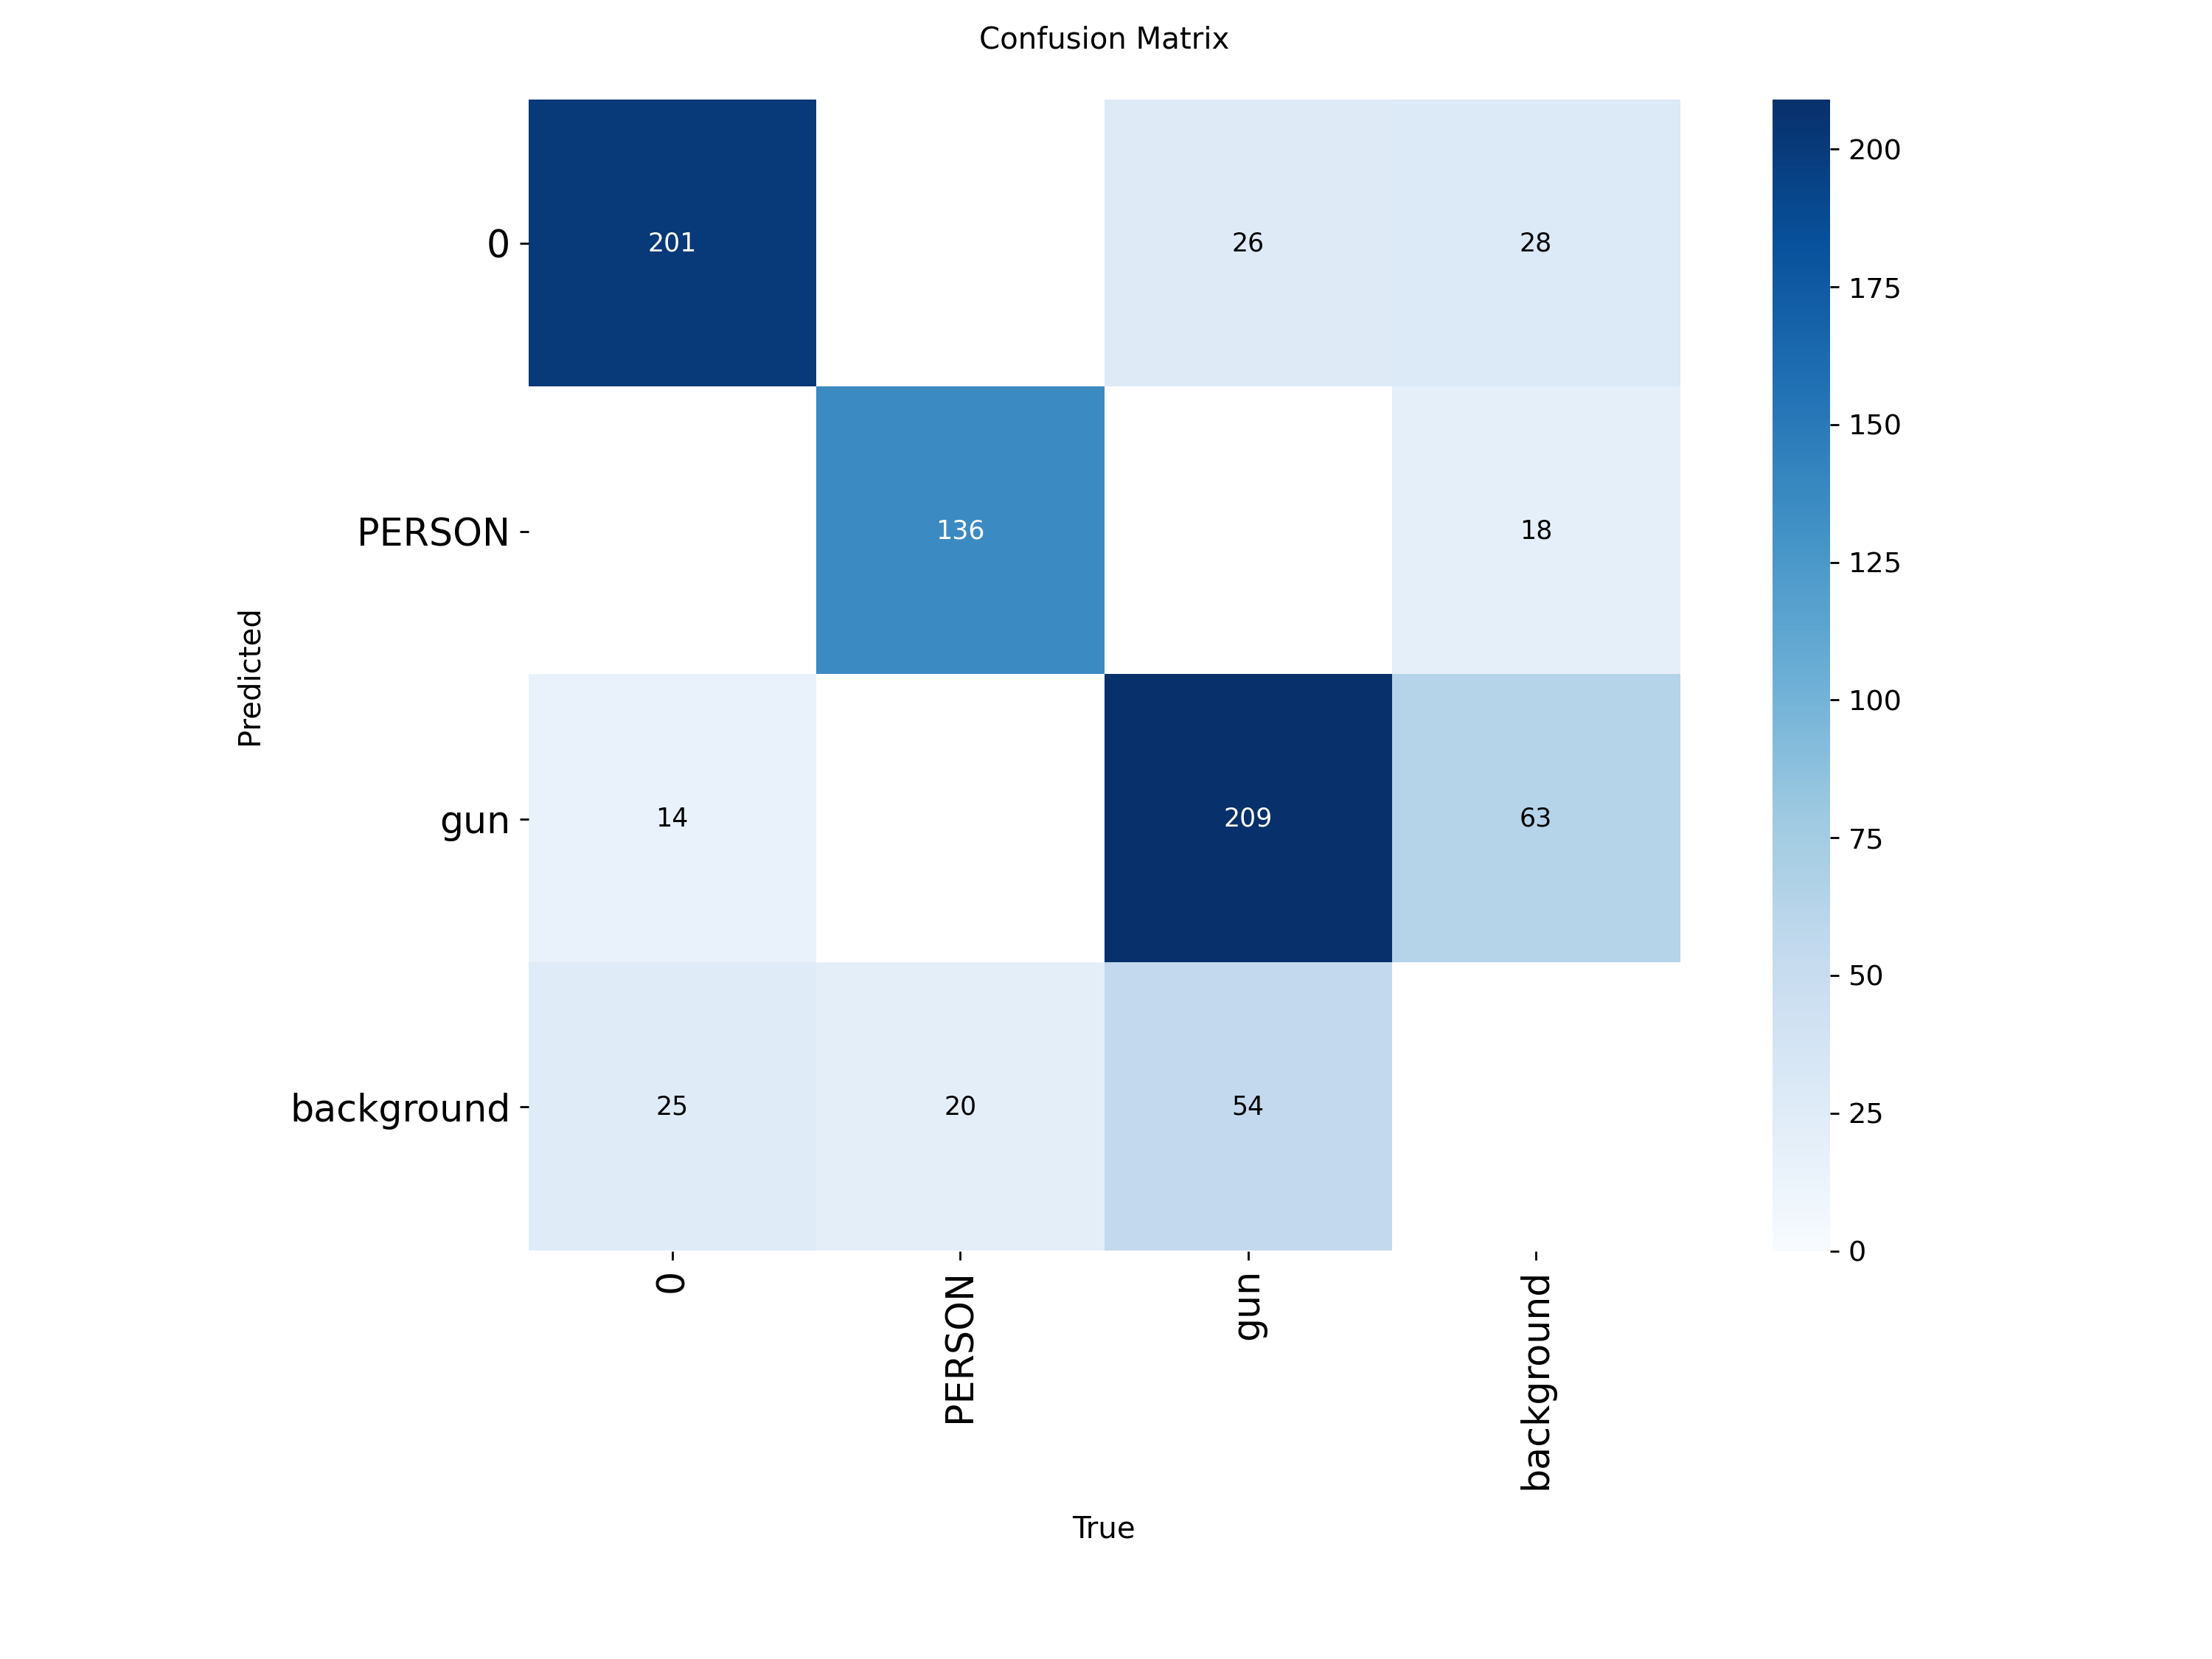

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/val/confusion_matrix.png'))

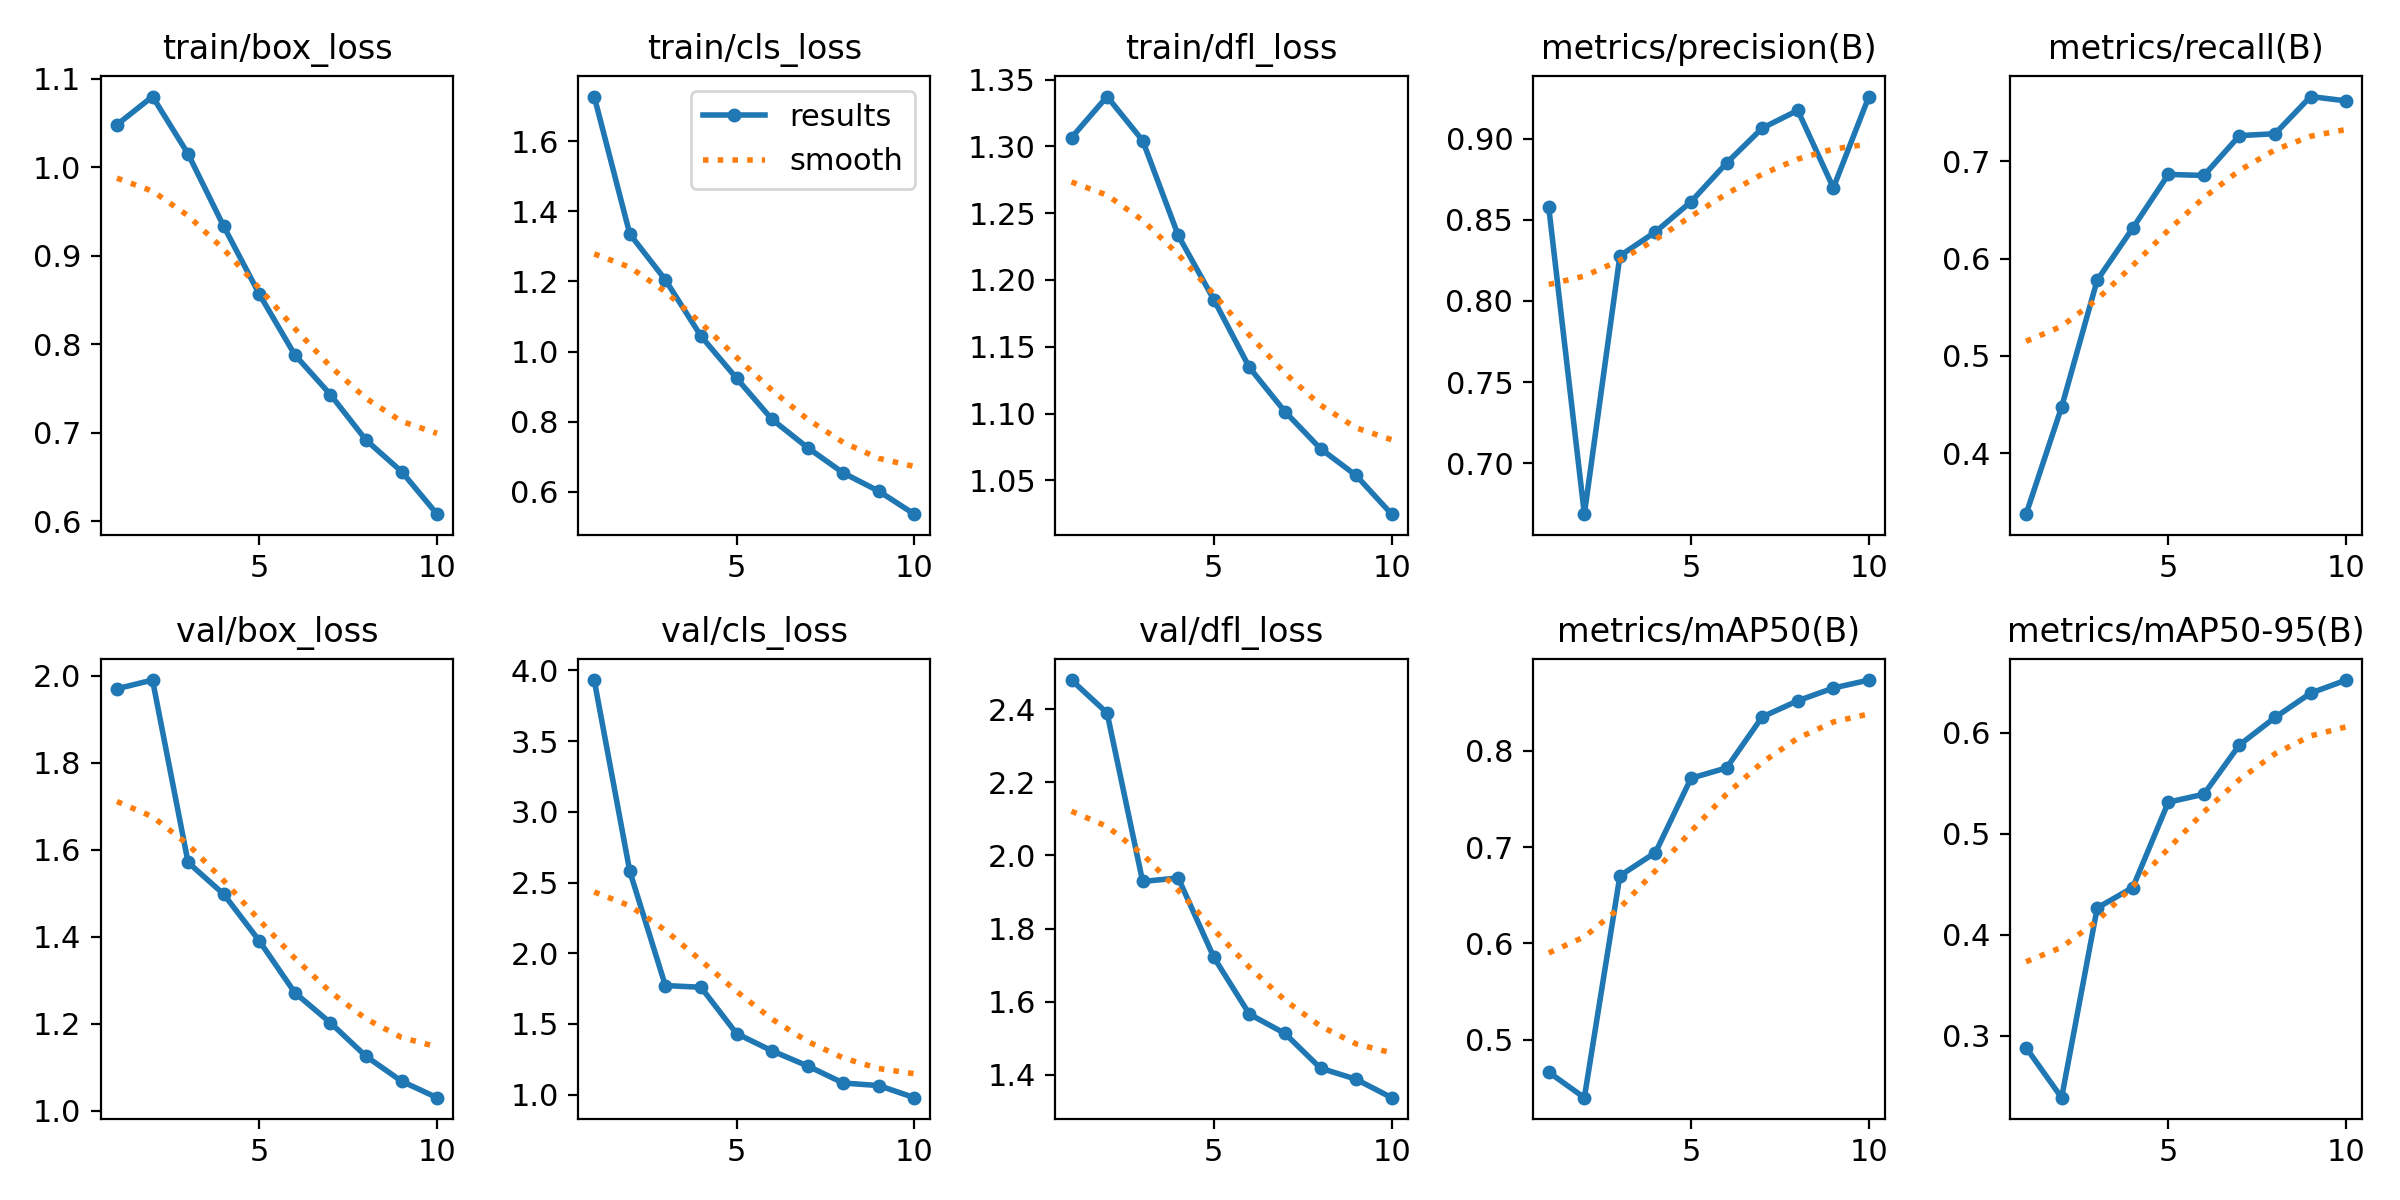

In [ ]:
Image(filename=f"/content/runs/detect/train2/results.png",width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/crime-detection-1/data.yaml

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1386.5±595.2 MB/s, size: 44.0 KB)
val: Scanning /content/crime-detection-1/valid/labels.cache... 439 images, 0 backgrounds, 0 corrupt: 100% 439/439 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:11<00:00,  2.44it/s]
                   all        439        685      0.926      0.762      0.874      0.653
                     0        234        240      0.906      0.796      0.872      0.645
                PERSON        151        156      0.963      0.834       0.94      0.735
                   gun        205        289      0.909      0.657      0.809      0.578
Speed: 0.8ms preprocess, 19.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https

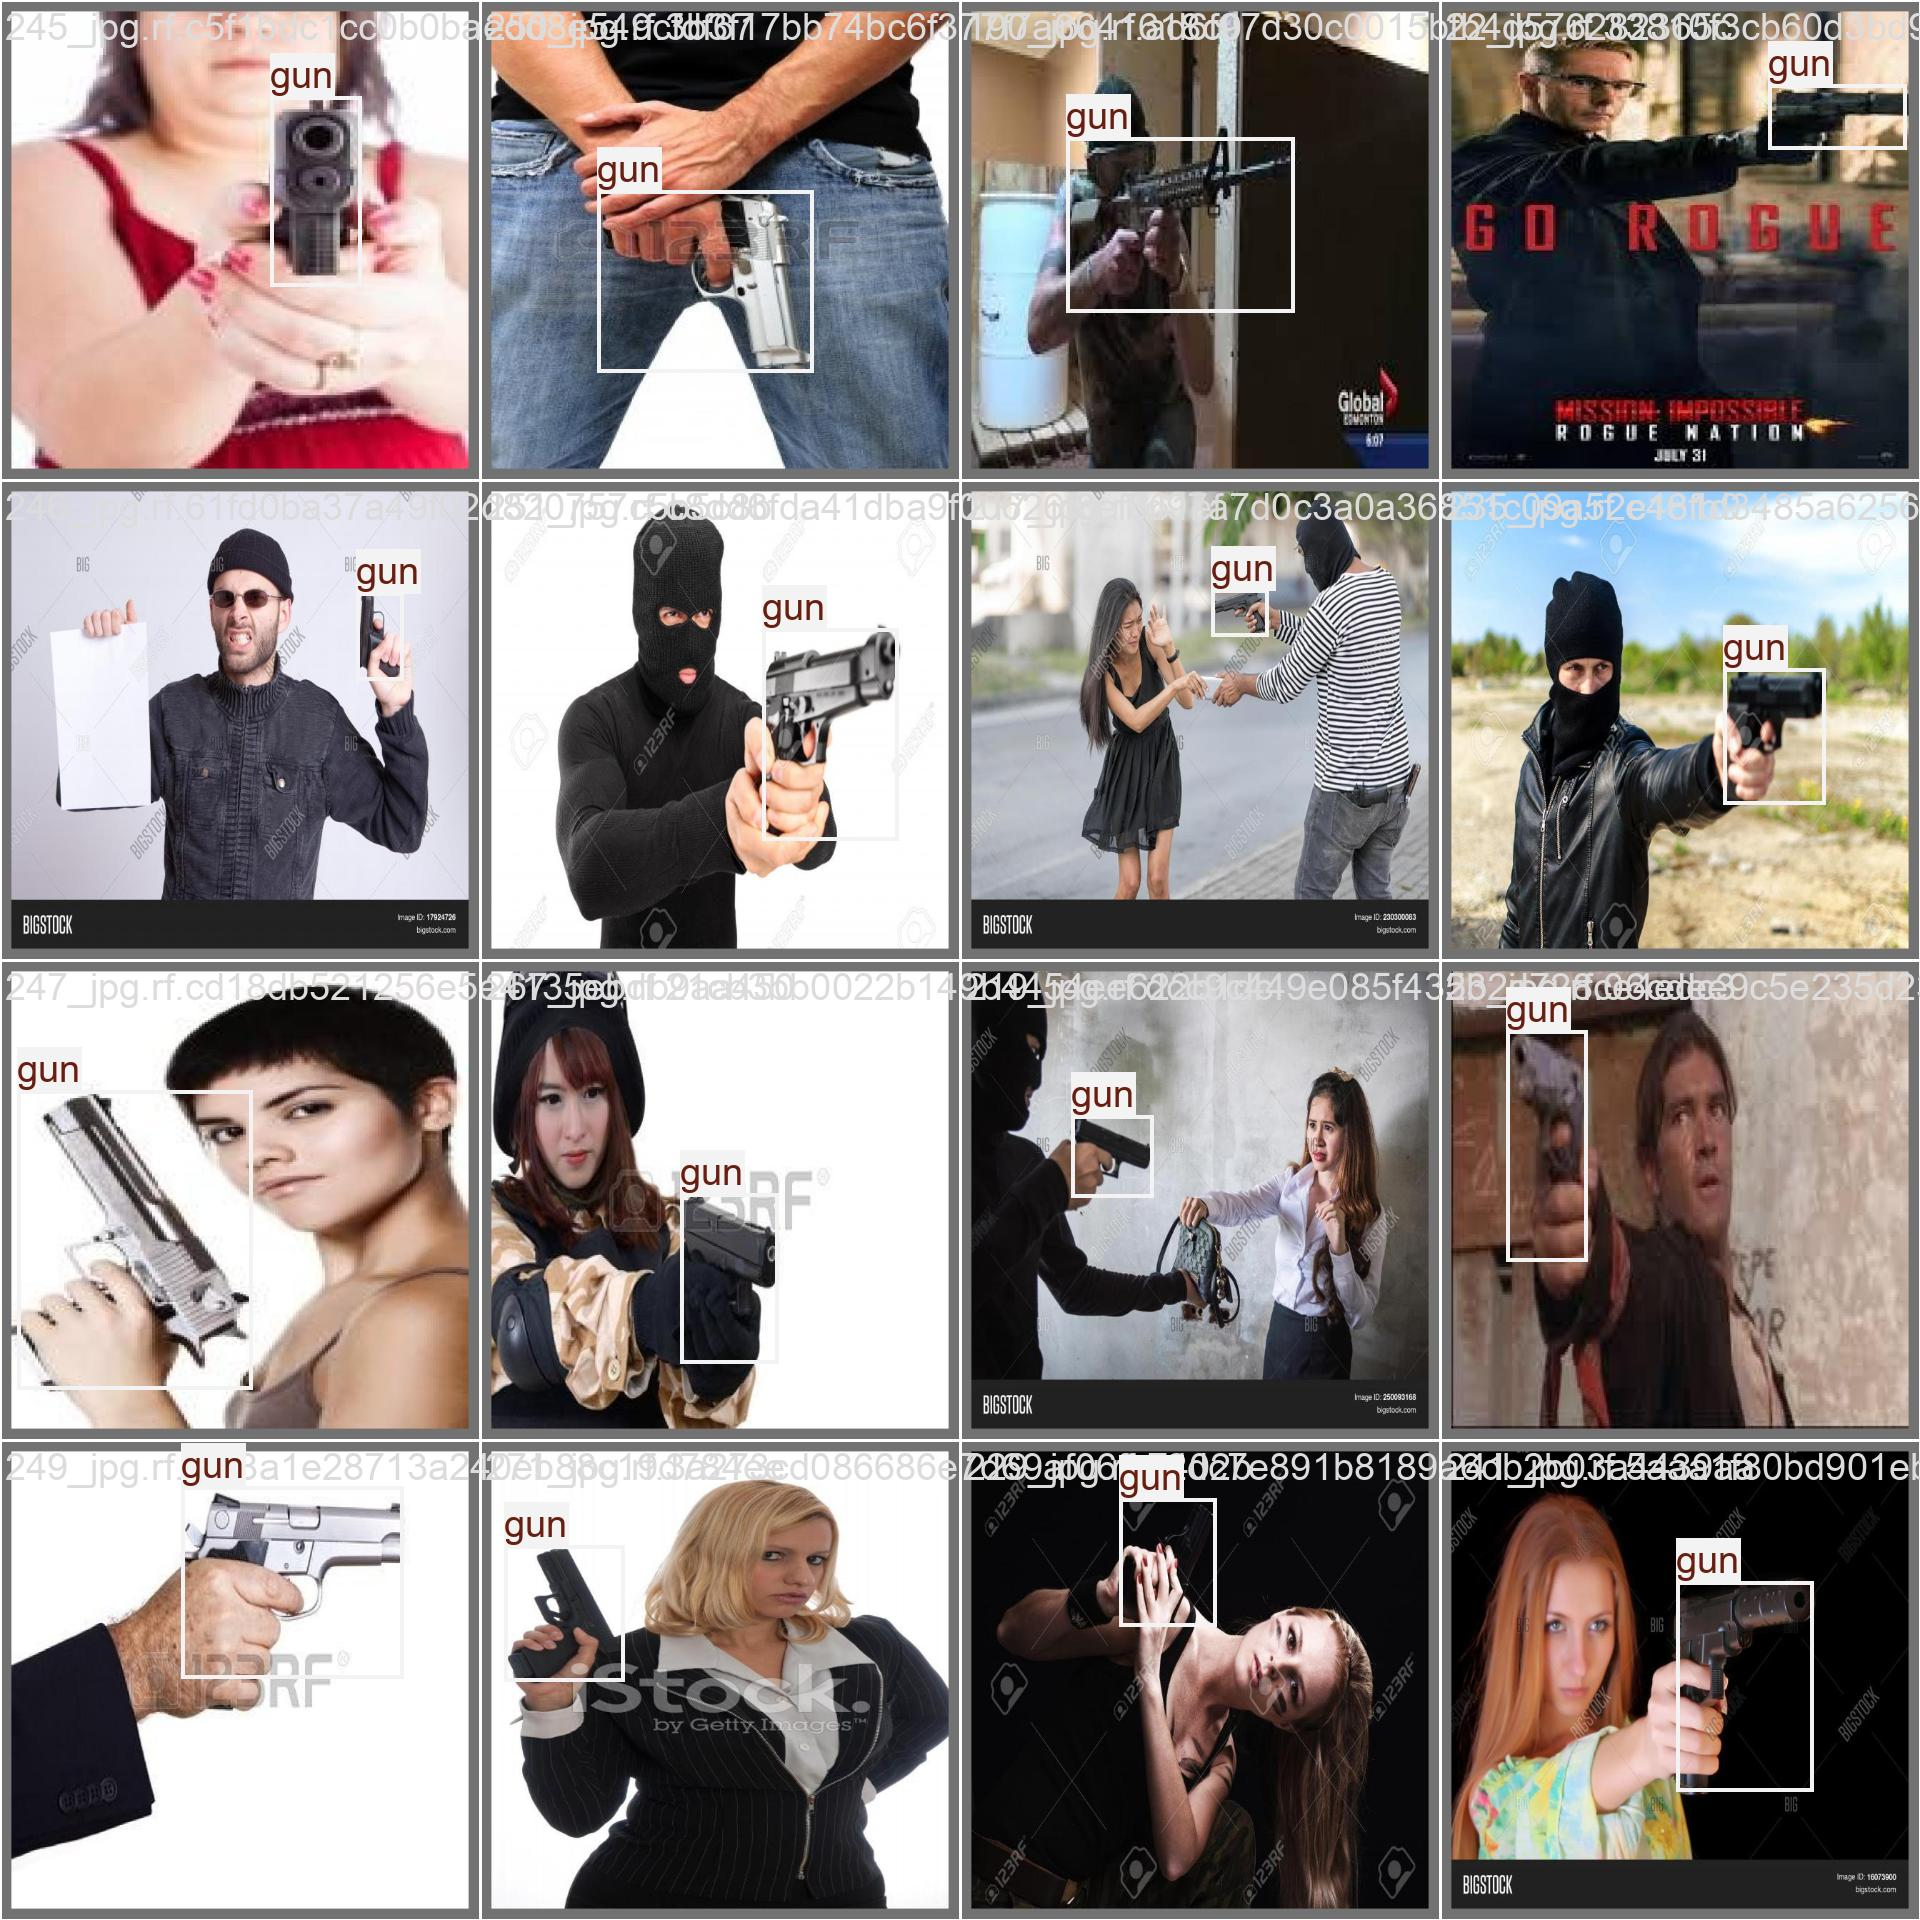

In [ ]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/runs/detect/val/val_batch2_labels.jpg'):
  display(Image(filename=imageName))
  print('\n')

In [ ]:
!pip install ultralytics
!pip install opencv-python
!pip install twilio  # If using SMS alerts


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving detected_objects_video (1).mp4 to detected_objects_video (1).mp4


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source="/content/runs/detect/val/val_batch1_labels.jpg"


Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/runs/detect/val/val_batch1_labels.jpg: 640x640 (no detections), 37.0ms
Speed: 4.2ms preprocess, 37.0ms inference, 28.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


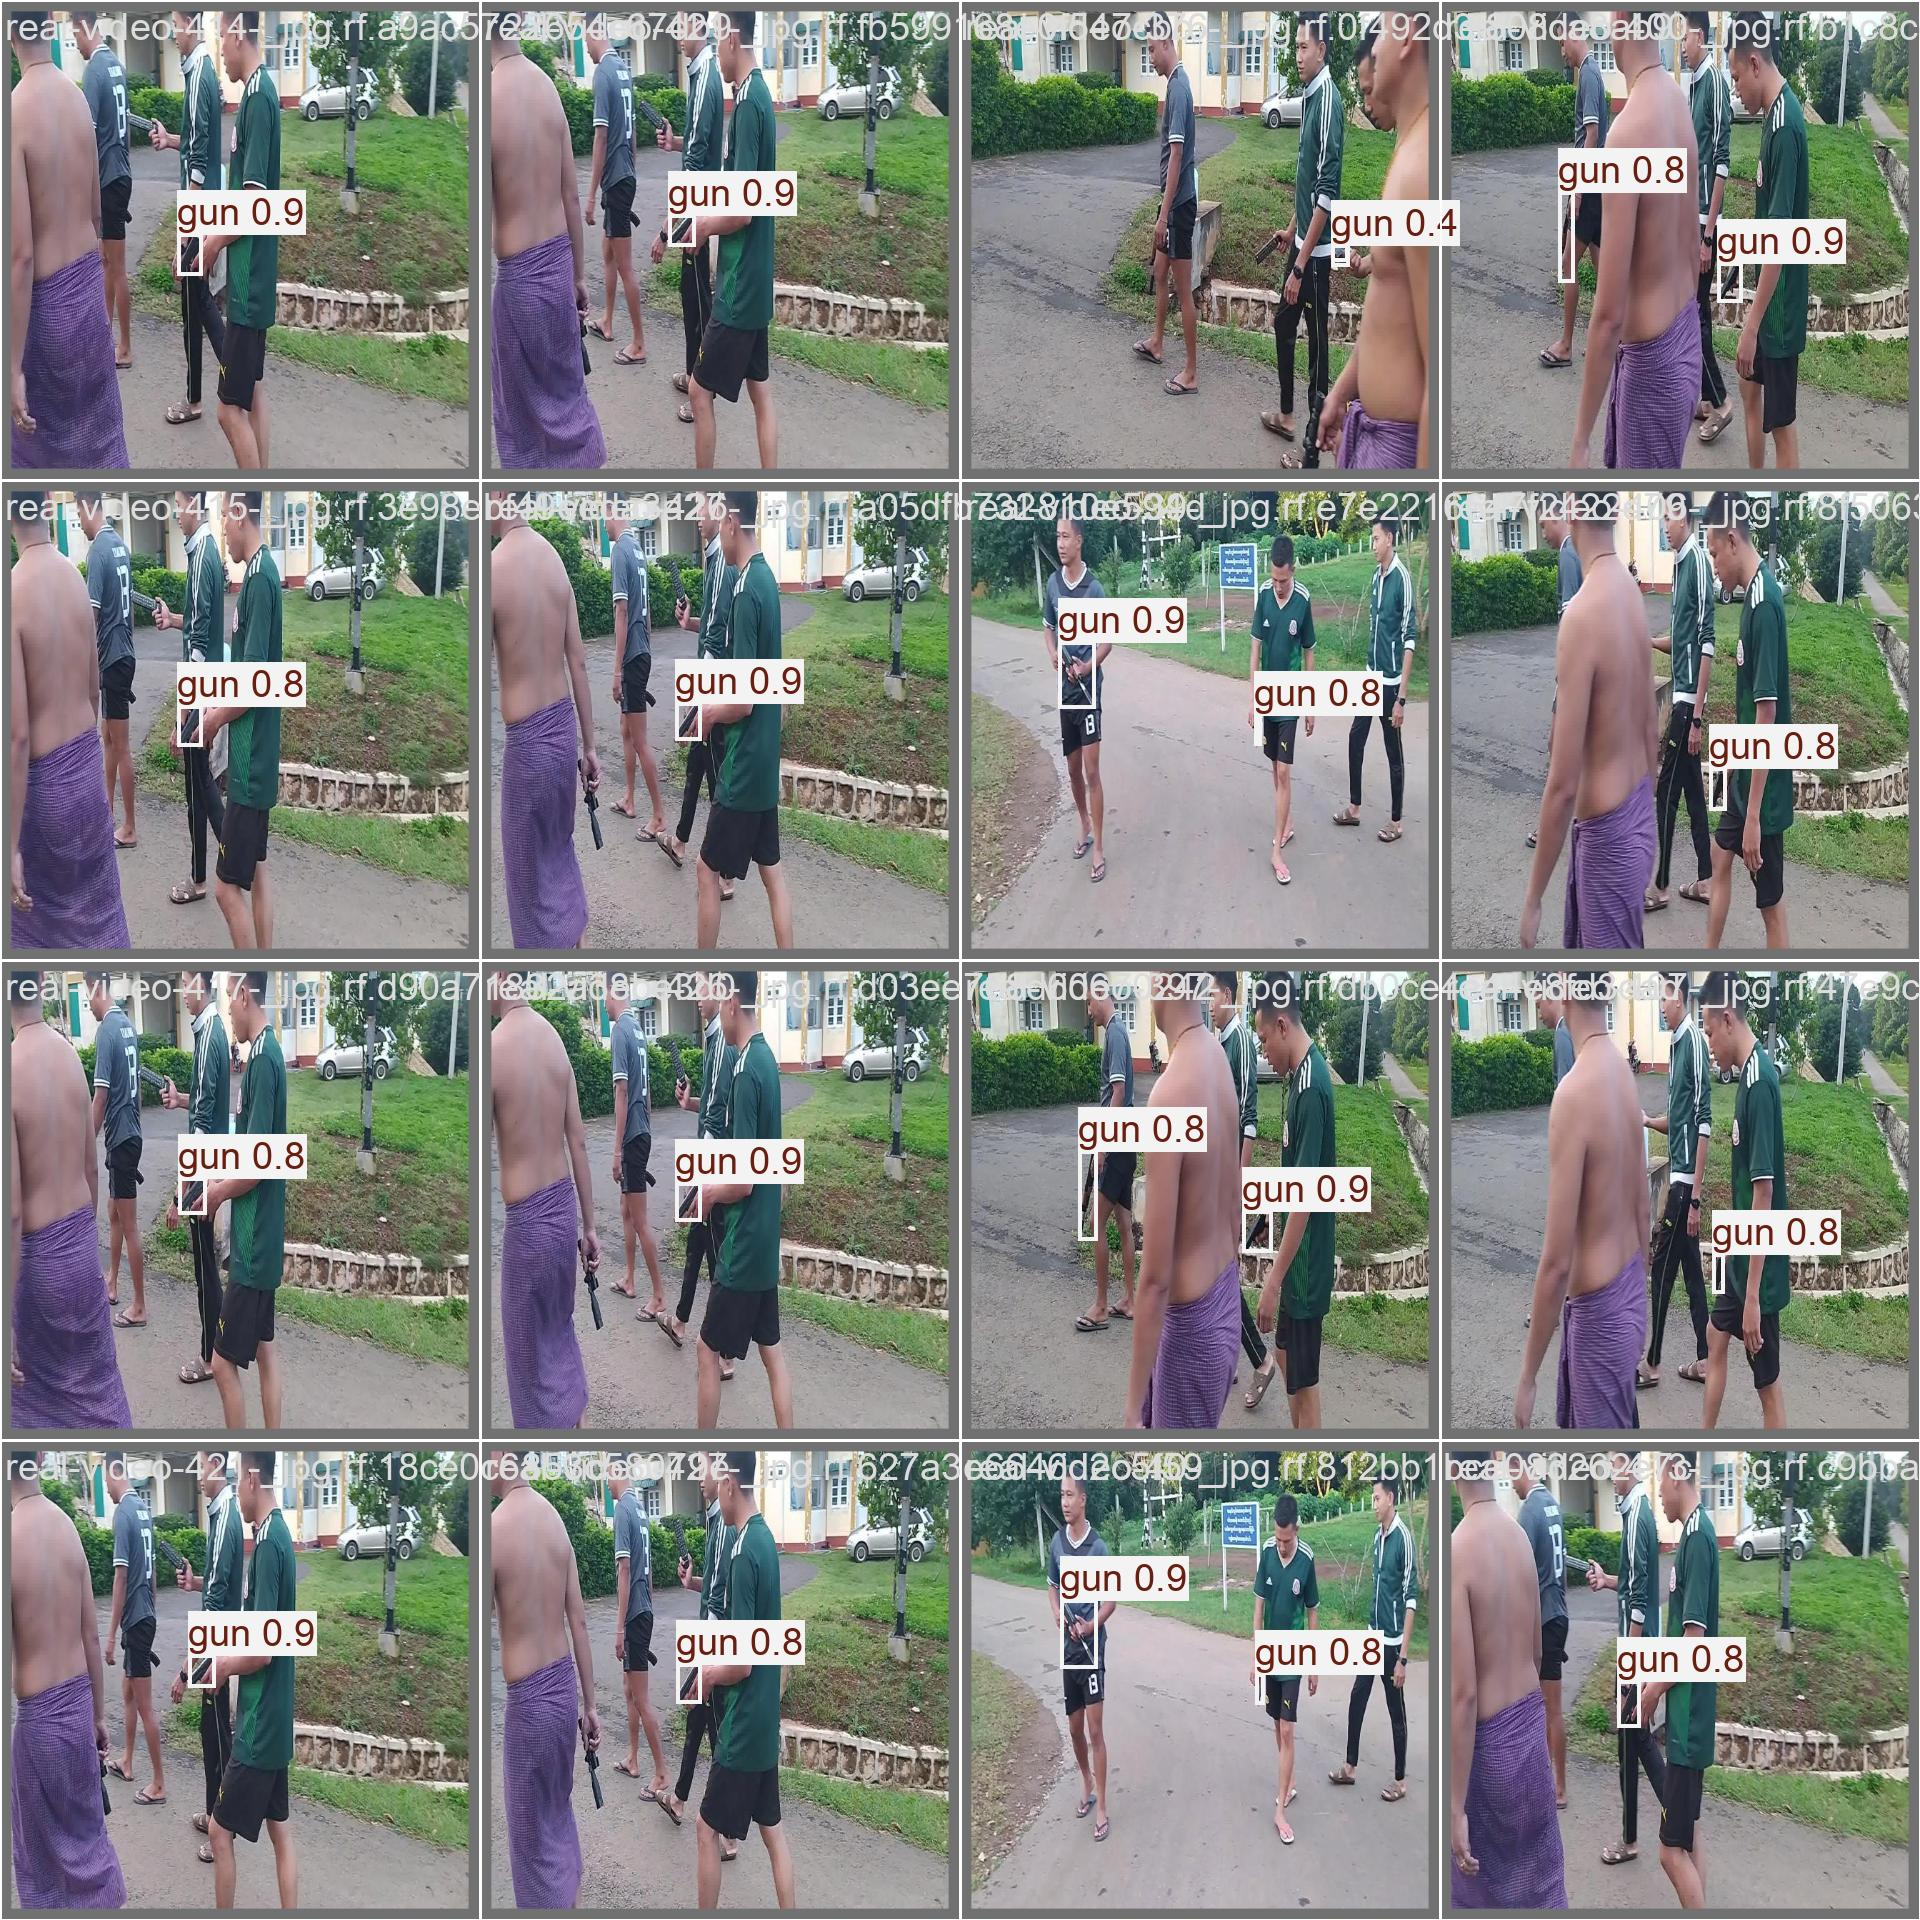

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/train2/val_batch0_pred.jpg'))


In [ ]:
!pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=1a1db208a59a6114b3dc1207be89a44b72290ded6bbd73441cbd8f44d3c7befc
  Stored in directory: /root/.cache/pip/wheels/cf/42/ff/7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound


In [ ]:
!pip install pygobject


In [ ]:
from ultralytics import YOLO
import cv2
import playsound
from google.colab.patches import cv2_imshow  # Needed for Colab image display

# Load your trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Start webcam (In Colab this won’t work directly – better to upload a video)
cap = cv2.VideoCapture(0)  # Change to a video file path if webcam not available in Colab

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection
    results = model(frame, verbose=False)

    for result in results:
        boxes = result.boxes
        for box in boxes:
            cls = int(box.cls[0])
            confidence = float(box.conf[0])
            label = model.names[cls]

            # Get coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Alert when confidence is high
            if confidence > 0.85:
                print(f"⚠️ ALERT: {label} Detected! ({confidence:.2f})")
                playsound.playsound(r"/content/drive/MyDrive/MINI_PROJECT/alert_sound.mp3")
                # ⚠️ Use an audio file (.mp3/.wav), NOT a .mp4 video file

    # Show frame in Colab
    cv2_imshow(frame)
    break   # 👈 In Colab we break after first frame, otherwise it loops forever

cap.release()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import time

# Load trained YOLO model (replace with your path)
model = YOLO("/content/runs/detect/train2/weights/best.ptt")   # your trained model (guns, knives, syringes, scissors)

# Open webcam (0 = default camera, or give video file path)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame")
        break

    # Run YOLO detection
    results = model(frame, verbose=False)

    # Draw detections
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])  # class ID
            conf = float(box.conf[0])  # confidence
            label = model.names[cls]   # class name

            # Bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw rectangle and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            # ⚠️ Alert if weapon detected with high confidence
            if conf > 0.85:
                print(f"🚨 ALERT: {label} detected! ({conf:.2f})")

    # Show the frame
    cv2.imshow("Weapon Detection", frame)

    # Quit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


FileNotFoundError: '/content/runs/detect/train2/weights/best.ptt' does not exist

SyntaxError: invalid syntax (ipython-input-2570183354.py, line 2)